In [2]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import numpy as np

!pip install unet
!pip install torchsummary
from torchsummary import summary

You should consider upgrading via the 'C:\Users\91958\Envs\pytorch\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\91958\Envs\pytorch\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import torch
import torch.nn as nn
from torchvision import models

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2, 2)
        
    )
def convrelu1(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True)
        
    )

class UNet(nn.Module):
    def __init__(self, n_class):
        super().__init__()
        
        self.convlayer1 = convrelu(3, 64, 3, 1)
        self.convlayer2 = convrelu(64, 128, 3, 1)
        self.convlayer3 = convrelu(128 , 256 , 3, 1)
        self.convlayer4 = convrelu(256, 512 ,3, 1)
        
        self.layer4_1x1 = convrelu1(512, 512, 1, 0)
        self.layer3_1x1 = convrelu1(256, 256, 1, 0)
        self.layer2_1x1 = convrelu1(128, 128, 1, 0)
        self.layer1_1x1 = convrelu1(64, 64, 1, 0)
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_up3 = convrelu1(512+256, 512, 3, 1)
        self.conv_up2 = convrelu1(512+128, 256, 3, 1)
        self.conv_up1 = convrelu1(256+64 , 64, 3, 1)
        

        self.conv_last = nn.Conv2d(64, n_class, 1)
        
        
    
    def forward(self , x):
        
        c1 = self.convlayer1(x)
        c2 = self.convlayer2(c1)
        c3 = self.convlayer3(c2)
        c4 = self.convlayer4(c3)
        
        c4 = self.layer4_1x1(c4)
        x = self.upsample(c4)
        c3 = self.layer3_1x1(c3)
        x = torch.cat([x, c3], dim=1) 
        x = self.conv_up3(x)
        
       
        x = self.upsample(x)
        c2 = self.layer2_1x1(c2)
        x = torch.cat([x, c2], dim=1)
        x = self.conv_up2(x)
        
        
        x = self.upsample(x)
        c1 = self.layer1_1x1(c1)
        x = torch.cat([x, c1], dim=1)
        x = self.conv_up1(x)
        
        x = self.upsample(x)
        
        out = self.conv_last(x)
        return out
               
        
        
net = UNet(6)

In [4]:
net

UNet(
  (convlayer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4_1x1): Sequential(
    (0): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(inplace=Tru

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
model = UNet(n_class=2)
model = model.to(device)

# summary(model, input_size=(3, 224, 224))

In [7]:
import scipy.io
mat = scipy.io.loadmat('C:\\Users\\91958\\stage1\\Subject_01.mat\\Subject_01.mat')

In [7]:
img_tensor = mat['images']
manual_fluid_tensor_1 = mat['manualFluid1']

img_array = np.transpose(img_tensor, (2, 0, 1))
manual_fluid_array = np.transpose(manual_fluid_tensor_1, (2, 0, 1))

In [154]:
img_array

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [ 27,  10,   0, ...,   0,   0, 255],
        [  0,  28,  10, ...,   0,   0, 255],
        [  0,  33,  12, ...,   0,   0, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [ 18,  22,  19, ...,   0, 255, 255],
        [ 21,  12,  12, ...,   0, 255, 255],
        [ 22,  14,   9, ...,   0, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [ 18,   0,  18, ...,   0,   0, 255],
        [  0,   0,  13, ...,   0,   0, 255],
        [  0,  14,  17, ...,   0,   0, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

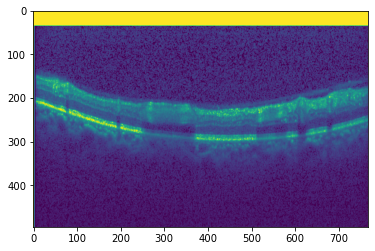

In [151]:
plt.imshow(img_array[60])

c:\users\91958\envs\pytorch\lib\site-packages\matplotlib\image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
c:\users\91958\envs\pytorch\lib\site-packages\matplotlib\image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
c:\users\91958\envs\pytorch\lib\site-packages\matplotlib\image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
c:\users\91958\envs\pytorch\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


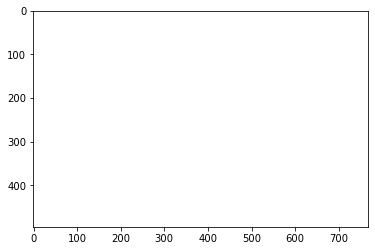

In [153]:
plt.imshow(manual_fluid_array[60])

In [10]:
img_array.shape

(61, 496, 768)

In [11]:
manual_fluid_array.shape

(61, 496, 768)

In [8]:
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
import os
from tqdm import tqdm
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),       
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                            std = [0.229, 0.224, 0.225])])

data_dir = "C:\\Users\\91958\\stage1\\Subject_01.mat\\"

def get_data(data_dir):
    x_train= []
    y_train= []
    
    for idx, file in enumerate(os.listdir(data_dir)):

        mat = scipy.io.loadmat(data_dir + file)
        img_tensor = mat['images']
        fluid_tensor = mat['manualFluid1']
        img_array = np.transpose(img_tensor, (2, 0 ,1)) / 255   ###scale in between 0 to 1
        
        img_array = resize(img_array, (61, 284, 284, 3))
        
        fluid_array = np.transpose(fluid_tensor, (2, 0 ,1))
      
        fluid_array  = resize(fluid_array, (61, 284, 284,1))

        x_train += [img_array[idx]]                    ### for all 10 files
        y_train += [fluid_array[idx]]        
        
        
    return np.array(x_train).reshape((10, 3, 284, 284)), np.array(y_train).reshape((10, 1, 284, 284))
    
#     img_array1 = resize(img_array, (img_array.shape[0], 284, 284))
#     img = torch.from_numpy(img_array1).unsqueeze(0)
#     fluid_array1  = resize(manual_fluid_array, (manual_fluid_array .shape[0], 196, 196))
#     labels = torch.from_numpy(fluid_array1).unsqueeze(0)
    
#     if transforms is not None:
#         X_train = transforms(img_array)
#         Y_train = transforms(fluid_array)
    
#     return img, labels


In [9]:
dataset = get_data(data_dir)

In [10]:
x_train, y_train = dataset

In [11]:
print(x_train.shape)

print(y_train.shape)

(10, 3, 284, 284)
(10, 1, 284, 284)


In [12]:
print(len(x_train))

10


In [17]:
from torch.utils.data import Dataset, DataLoader ,random_split


trainloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)



In [23]:
x_train, y_train= trainloader

In [25]:
print(x_train.shape)
print(y_train.shape)

torch.Size([1, 10, 1, 284, 284])
torch.Size([1, 10, 3, 284, 284])


In [14]:

import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.optim import lr_scheduler
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(net.to(device).parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [15]:
from sklearn.metrics import precision_score,f1_score
num_epochs = 5
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0): 
        exp_lr_scheduler.step()
        
        for images, labels in trainloader:
                images = images.to(device) 
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, torch.max(labels, 1)[1])
                loss.backward()
                optimizer_ft.step()
                

                total += labels.size(0)
                preds = torch.sigmoid(outputs).data > 0.5
                preds = preds.to(torch.float32)
                
                correct += f1_score(labels.to("cpu").to(torch.int).numpy() ,preds.to("cpu").to(torch.int).numpy() , average="samples")  * images.size(0)
                
                print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss.item(), correct/total))
        
#         torch.save(net.state_dict(), os.path.join(model_dir, 'epoch-{}.pt'.format(epoch)))

print('Finished Training')

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 1 and 3 in dimension 2 at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensor.cpp:612